<a href="https://colab.research.google.com/github/ChangED1122/Python/blob/main/PCA_lion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from PIL import Image

In [ ]:
lion = Image.open('/content/lion.jpg')
train = numpy.array(lion)
train=train.astype(np.uint8)
d2_train=train.mean(axis=2)
d2_train.shape
plt.imshow(d2_train)
d2_train.shape

(337, 600, 3)


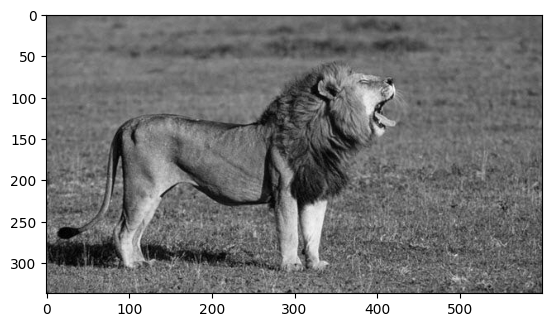

In [ ]:
from matplotlib.pyplot import imread
img = imread('/content/lion.jpg')
print(img.shape)
img = img.mean(axis=2)
plt.imshow(img, cmap="gray")

In [ ]:
def transform(n_components):
    tswizzle_pca = PCA(n_components).fit(img)
    transformed = tswizzle_pca.transform(img)
    projected = tswizzle_pca.inverse_transform(transformed)
    plt.imshow(projected, cmap="gray")

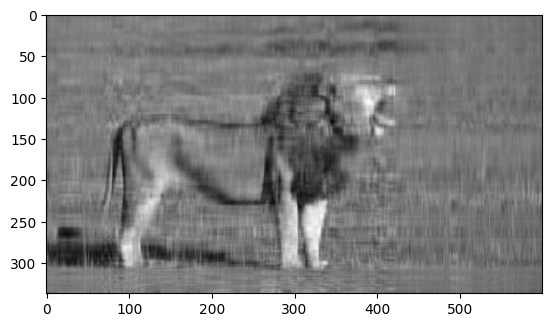

In [ ]:
transform(15)

In [ ]:
import matplotlib.pyplot as plt
RGB_img = plt.imread('/content/lion.jpg')
print(type(RGB_img))
print(RGB_img.shape)

<class 'numpy.ndarray'>
(337, 600, 3)


In [ ]:
import cv2
b, g, r = cv2.split(RGB_img)

In [ ]:
print("Red channel")
print(type(r))
print(r.shape)
print("\nGreen channel")
print(type(g))
print(g.shape)
print("\nBlue channel")
print(type(b))
print(b.shape)

Red channel
<class 'numpy.ndarray'>
(337, 600)

Green channel
<class 'numpy.ndarray'>
(337, 600)

Blue channel
<class 'numpy.ndarray'>
(337, 600)


In [ ]:
r_scaled = r / 255  #(0, 255)/255 ~ (0, 1)  each image pixel value is represented by a number ranging from 0 to 255
g_scaled = g / 255
b_scaled = b / 255

In [ ]:
from sklearn.decomposition import PCA

pca_r = PCA(n_components=40)
pca_r_trans = pca_r.fit_transform(r_scaled)

pca_g = PCA(n_components=40)
pca_g_trans = pca_g.fit_transform(g_scaled)

pca_b = PCA(n_components=40)
pca_b_trans = pca_b.fit_transform(b_scaled)

In [ ]:
print("Explained variances by each channel")
print("-----------------------------------")
print("Red:", np.sum(pca_r.explained_variance_ratio_ ) * 100)
print("Green:", np.sum(pca_g.explained_variance_ratio_ ) * 100)
print("Blue:", np.sum(pca_b.explained_variance_ratio_ ) * 100)

Explained variances by each channel
-----------------------------------
Red: 83.16009415990526
Green: 89.2313741351822
Blue: 91.23492842455227


In [ ]:
pca_r_org = pca_r.inverse_transform(pca_r_trans)
pca_g_org = pca_g.inverse_transform(pca_g_trans)
pca_b_org = pca_b.inverse_transform(pca_b_trans)
img_compressed = cv2.merge((pca_b_org, pca_g_org, pca_r_org))

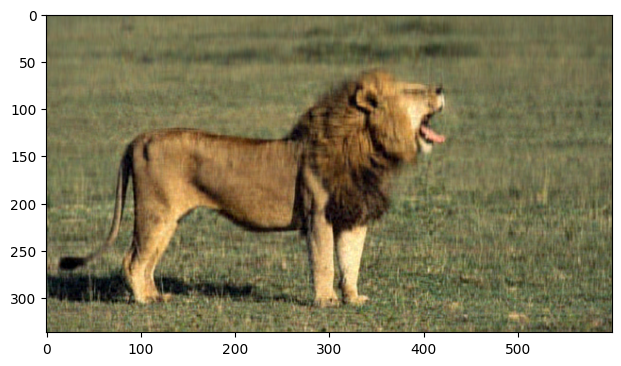

In [ ]:
plt.figure(figsize=[7.3, 7.3])
plt.imshow(img_compressed)